<a href="https://colab.research.google.com/github/Ken-Lau-Lab/single-cell-lectures/blob/main/Copy_of_section04_DataQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/Ken-Lau-Lab/single-cell-lectures/blob/main/section04_DataQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook go through steps to generate ambient contamination metric plots to check the quality of a scRNA-seq dataset

## Preparation Steps 
### 1. Install required packages 

In [1]:
! pip install pandas==1.3
! pip install numpy==1.22
! pip install scanpy==1.9.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 31.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 33.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 KB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 KB 7.7 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=20118a7afe4ea2595a5790c7eed02f1c7d1f2601d6ccc

In [2]:
! pip install matplotlib

#==3.6.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install dropkick==1.2.1

In [4]:
!pip install POT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.3/682.3 KB 32.0 MB/s eta 0:00:00


clone the github that has codes for ambient contamination analysis

In [5]:
! git clone https://github.com/Ken-Lau-Lab/AmbientContaminationMetrics.git

Cloning into 'AmbientContaminationMetrics'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 57 (delta 23), reused 47 (delta 16), pack-reused 0
Unpacking objects: 100% (57/57), 1.62 MiB | 2.10 MiB/s, done.


### 2. Import packages 

In [2]:
import sys
import numpy as np
import pandas as pd

In [1]:
import matplotlib

In [3]:
import scanpy as sc

In [4]:
import dropkick as dk

At this point, if dropkick cannot be imported, uncomment the next cell and run it. Then, <font color='red'>restart runtime</font> after installing. Run all the <font color='#b225f6'>import</font> cells after restart the runtime 

In [ ]:
#! pip install matplotlib

Found existing installation: matplotlib 3.6.2
Uninstalling matplotlib-3.6.2:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.2-py3.8-nspkg.pth
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.2.dist-info/*
    /usr/local/lib/python3.8/dist-packages/matplotlib/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.8/dist-packages/pylab.py
Proceed (Y/n)? Y
  Successfully uninstalled matplotlib-3.6.2


In [5]:
sys.path.append("./AmbientContaminationMetrics/")
sys.path.append("./AmbientContaminationMetrics/QCPipe_dir/")
#add the path of the contamination python files to the notebook's search path so that they can be imported 

In [6]:
import quality_control_function as qc_functions
import plot_quality_score as qc_plts
import QCPipe

### 3. Download data files 

In [7]:
! mkdir 7017_YX_1
# this line created a folder '7017_YX_1' in the current working directory

In [16]:
%cd ./7017_YX_1/
# get into the folder we just created 

! pwd
#print the current directory to make sure we are in the folder

/content/7017_YX_1
/content/7017_YX_1


In [17]:
! curl -O -J -L https://www.dropbox.com/sh/af9ih0g50bveqoy/AABg1o8xOzlIXTsinxUQKzAra?dl=0
# download data from the url 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   134    0   134    0     0   1007      0 --:--:-- --:--:-- --:--:--  1007
100   276  100   276    0     0    349      0 --:--:-- --:--:-- --:--:--     0
100 53.3M  100 53.3M    0     0  31.3M      0  0:00:01  0:00:01 --:--:--  129M
curl: Saved to filename 'cmraw_sparse.zip'


In [18]:
! unzip cmraw_sparse.zip
#unzipping the folder to get separated files 

Archive:  cmraw_sparse.zip
mapname:  conversion of  failed
 extracting: 7017-YX-1_S1_L005_counts.mtx  
 extracting: 7017-YX-1_S1_L005_barcodes.txt  
 extracting: 7017-YX-1_S1_L005_features.txt  


note the 3 enssential files for RNA-seq data: the count matrix, a list of barcodes and a list of gene names (feature) 

## Generating metric plots
### 1. Read data into an anndata object and cut to 10,000 barcodes 

/content/7017_YX_1/*features.*
Calculating QC Metrics
Inflection point at [ 4341 11047 17754] for [0, 15, 30] percentiles of greatest secant distances
the original dataset has 49053 cells. Cut to 10000 cells


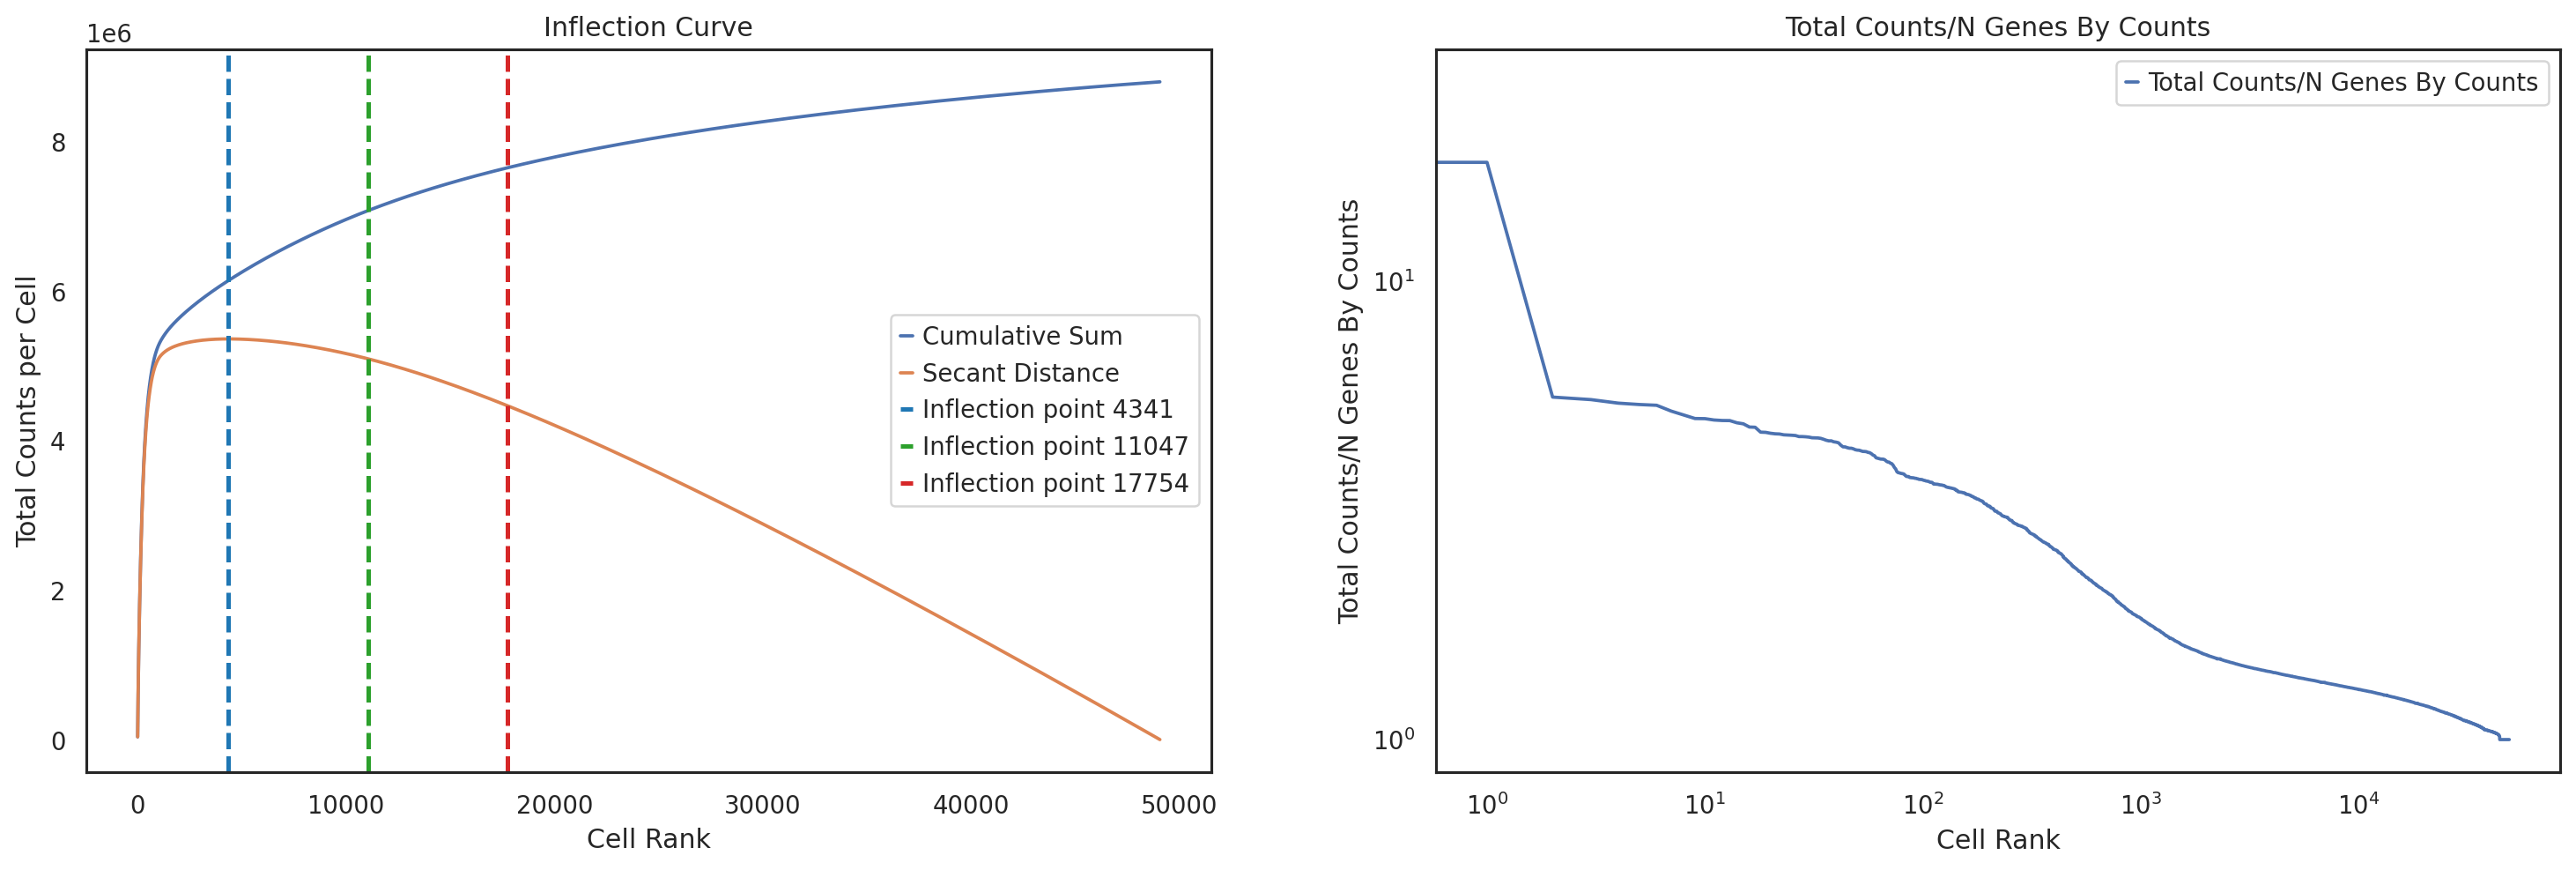

In [19]:
dat = qc_functions.cut_off_from_dropset( "/content/7017_YX_1", gene_file_delim="\t", barcode_file_delim="\t", mito_tag="mt-"  )
# the first parameter is the path name where the data files are stored 
# the second and third param are specifiying delimiter used in the files (csv needs to use ',', tsv needs to use '\t' ... )
# more parameter specification can be found in the documentation 


As I mentioned earlier, note there were 50,000 cells in the raw file initially, but most of them are empty droplets as you can see the plateau. Conventionally we keep 10,000 cells to proceed.

### 2. Generate the metric plots

In [ ]:
ret = qc_plts.formatted_figures_inverted(dat, ncols = 2, )

In [21]:
dat
#check information in this anndata object

View of AnnData object with n_obs × n_vars = 10000 × 19171
    obs: 'total_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial'
    var: 'Mitochondrial', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'Order', 'inflection1', 'inflection_fold'

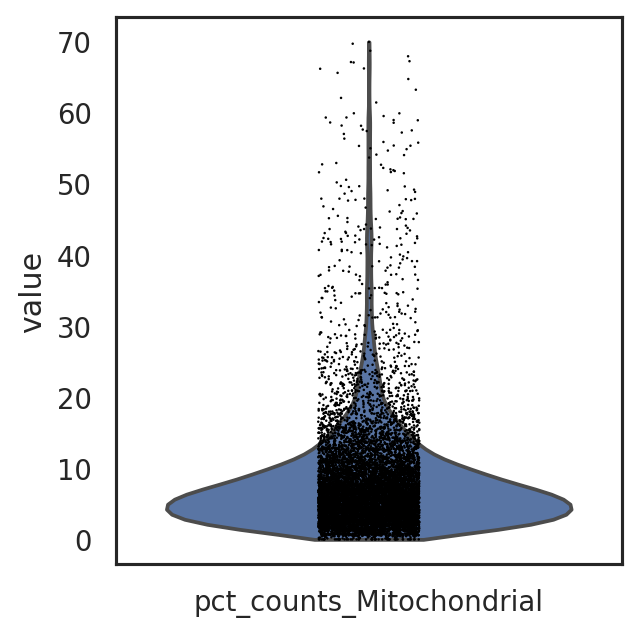

In [22]:
 sc.pl.violin(dat, "pct_counts_Mitochondrial")
 # Visualize one of the standard qc metrics with scanpy pl module functions 

<AxesSubplot: >

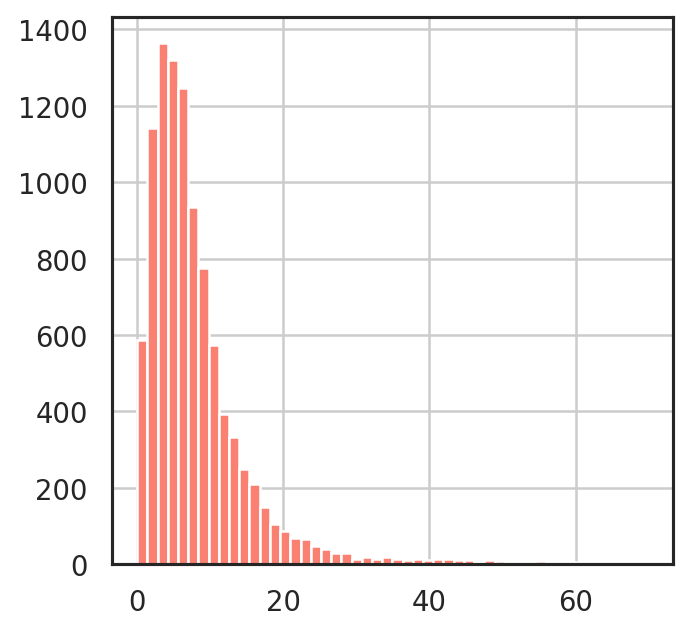

In [25]:
dat.obs["pct_counts_Mitochondrial"].hist(bins = 50, color ='salmon')
# can also use matplotlib
# this hist() is a method called on the dataframe 'dat.obs["pct_counts_Mitochondrial"]', which is a subset of dat.obs dataframe

## Working with Filtered Data

In [30]:
%cd /content/ #change back to the home directory 

! curl -O -J -L https://www.dropbox.com/s/tvn3s1413julpjs/YX1_7017_cells.h5ad?dl=0 
#download the filtered dataset 

/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   127    0   127    0     0    628      0 --:--:-- --:--:-- --:--:--   625
100   340  100   340    0     0    699      0 --:--:-- --:--:-- --:--:--   699
100   534    0   534    0     0    641      0 --:--:-- --:--:-- --:--:--   641
100 19.9M  100 19.9M    0     0  14.9M      0  0:00:01  0:00:01 --:--:--  120M
curl: Saved to filename 'YX1_7017_cells.h5ad'


In [31]:
filtered_dat = sc.read("/content/YX1_7017_cells.h5ad")

In [32]:
filtered_dat

AnnData object with n_obs × n_vars = 783 × 18894
    obs: 'total_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'n_genes_by_counts_zscore', 'relative_transcript_diversity_threshold', 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'n_counts', 'leiden', 'Cell_Selection'
    var: 'Mitochondrial', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'dropkick_coef', 'mean', 'std'
    uns: 'Order', 'dropkick_args', 'dropkick_label_colors', 'dropkick_thresholds', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [33]:
standard_qc_metrics =  ['total_counts', 'n_genes_by_counts',"pct_counts_in_top_200_genes", 'pct_counts_Mitochondrial', "dropkick_score" , 'leiden']

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


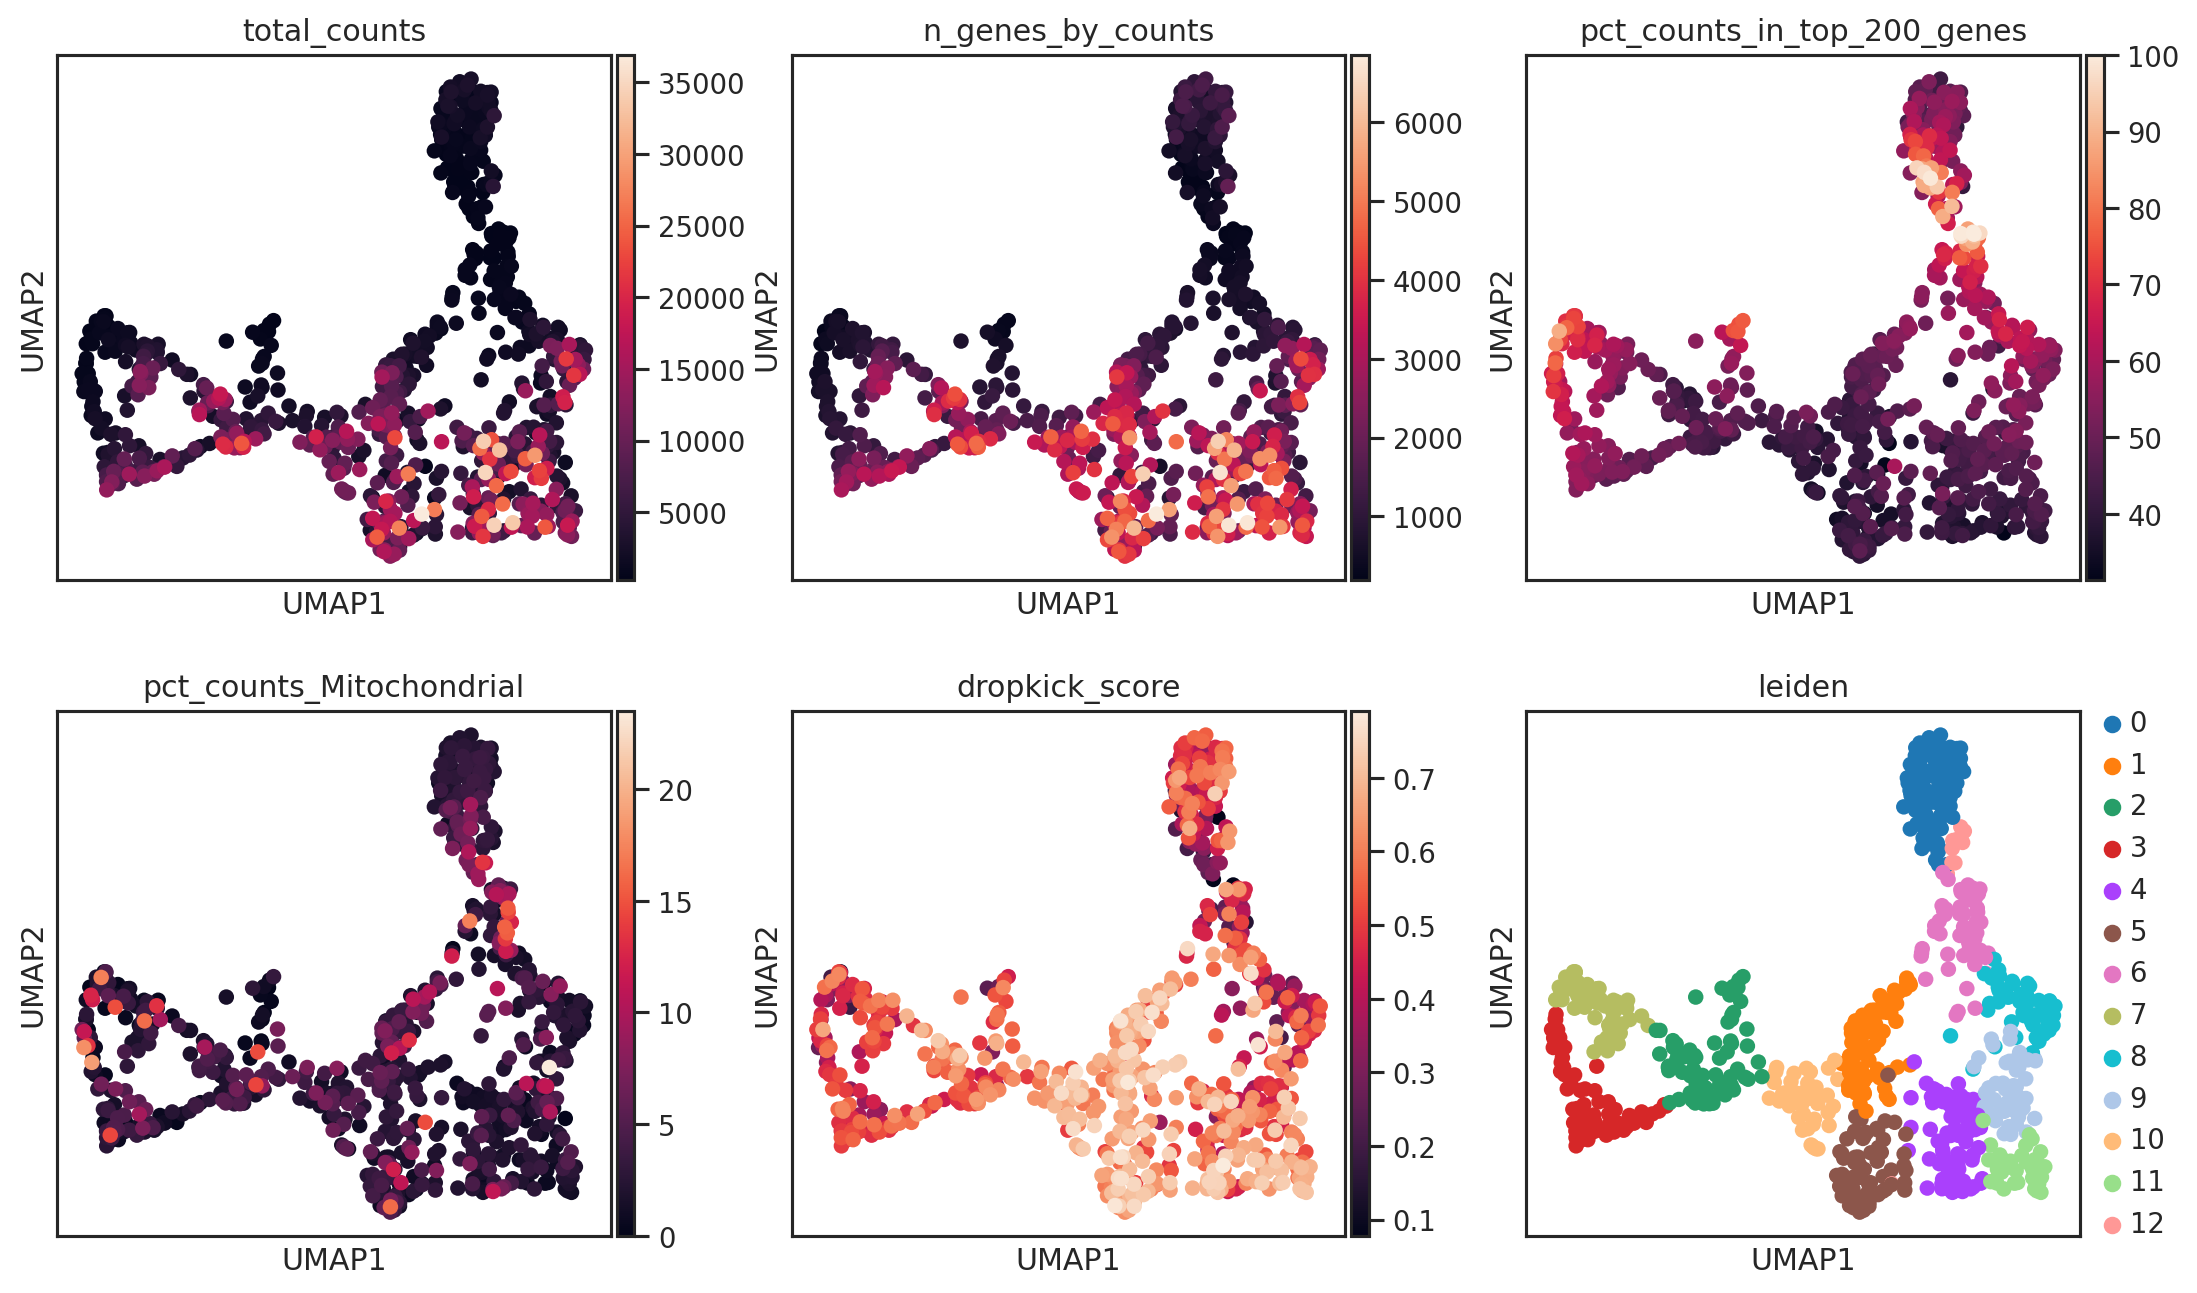

In [34]:
sc.pl.umap(filtered_dat, color = standard_qc_metrics, ncols=3)